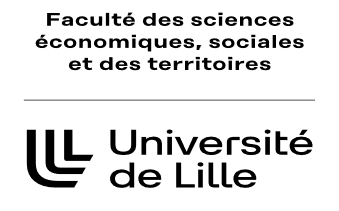
     
<h4 style='text-align:right;'> <span style="font-family:Times New Roman">Nom et Prénom:</span> </h4>     
<p style='text-align:right;'> <span style="font-family:Times New Roman">MAHAMAT Youssouf</span> </p>

# <span style="font-family:Times New Roman"> Projet 3: Arbre de décision  </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Lecture du dataset pret.csv

In [2]:
pret = pd.read_csv('pret.csv')

# Affichage des 20 premières lignes 

In [3]:
pret.head(20)

,creditPolitique,objet,tauxInteret,mensualite,revenuAnnuel,ratio,fico,nbreJourValiadationCredit,montantImpaye,tauxUtilisationCredit,reclammations,nbreRetards,jurisprudence,nonPaye
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


# Affichage des valeurs de la colonne objet

In [4]:
pret['objet'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

# Analyse exploratoire des données

Créer un histogramme de deux distributions FICO superposées, une pour chaque résultat creditPolitique

Text(0.5, 0, 'Indicateur FICO')

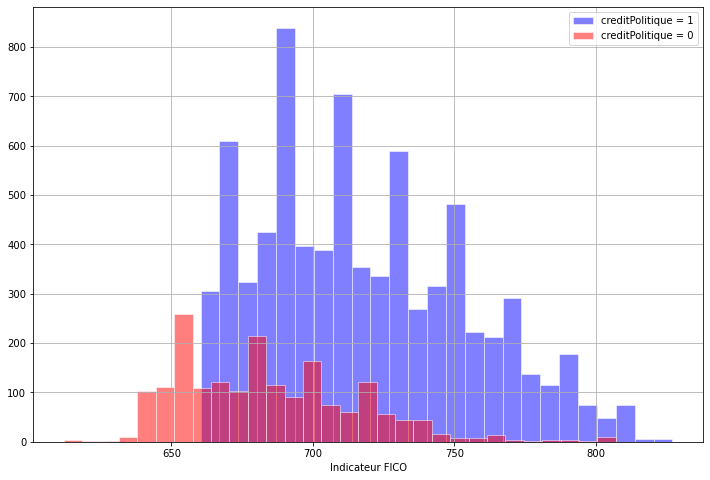

In [5]:
plt.figure(figsize = (12,8))
pret[pret['creditPolitique'] == 1]['fico'].hist(bins = 30, color = 'b', edgecolor = 'w',
                                               alpha = 0.5, label = 'creditPolitique = 1')

pret[pret['creditPolitique'] == 0]['fico'].hist(bins = 30, color = 'r', edgecolor = 'w',
                                               alpha = 0.5, label = 'creditPolitique = 0')
plt.legend()
plt.xlabel('Indicateur FICO')

Créer un chiffre similaire, sauf cette fois sélectionner par la colonne nonPaye

Text(0.5, 0, 'Indicateur FICO')

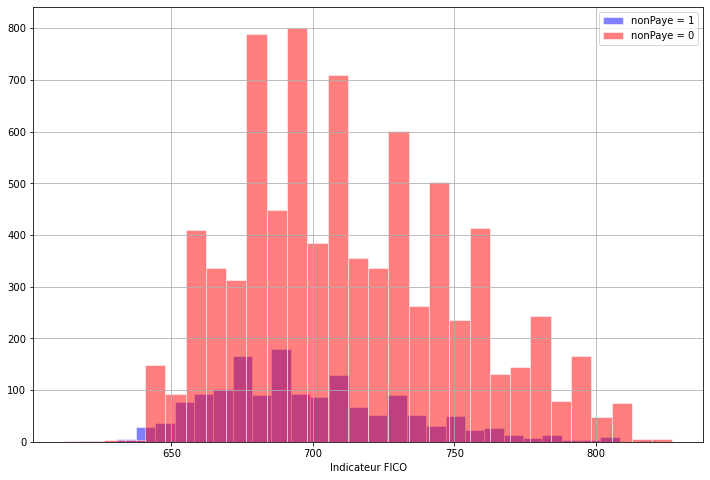

In [6]:
plt.figure(figsize = (12,8))
pret[pret['nonPaye'] == 1]['fico'].hist(bins = 30, color = 'b', edgecolor = 'w',
                                               alpha = 0.5, label = 'nonPaye = 1')

pret[pret['nonPaye'] == 0]['fico'].hist(bins = 30, color = 'r', edgecolor = 'w',
                                               alpha = 0.5, label = 'nonPaye = 0')
plt.legend()
plt.xlabel('Indicateur FICO')

Créer un countplot en utilisant seaborn montrant le nombre de prêts par objet, avec la couleur définie par nonPaye

<AxesSubplot:xlabel='objet', ylabel='count'>

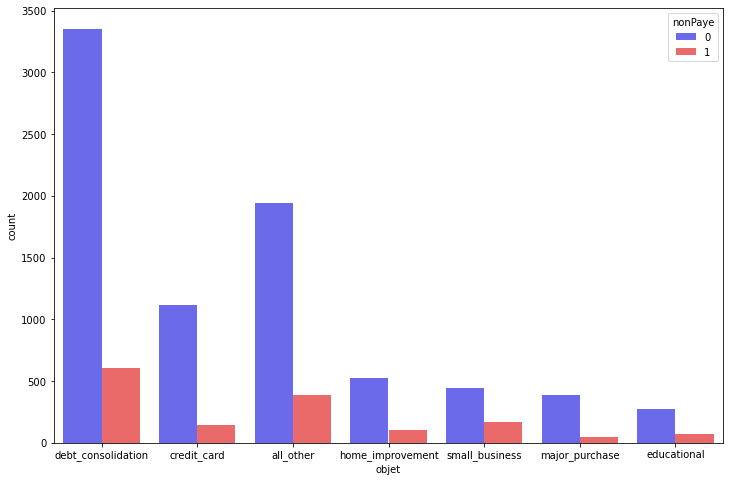

In [7]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'objet', hue = 'nonPaye', data = pret, palette = 'seismic' )

la tendance entre le score FICO et le taux d’intérêt

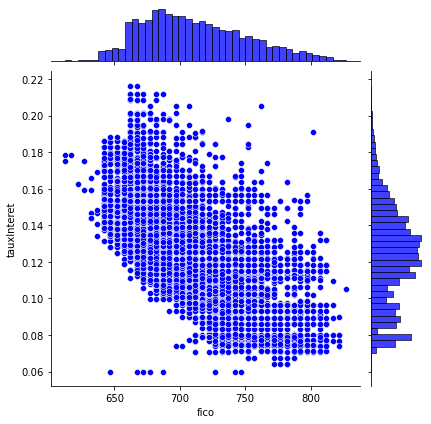

In [8]:
sns.jointplot(x = 'fico', y='tauxInteret', data = pret, color = 'b')

<Figure size 864x576 with 0 Axes>

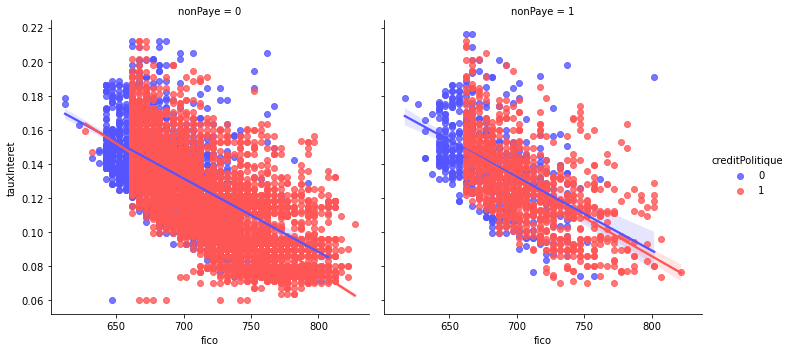

In [9]:
plt.figure(figsize = (12,8))
sns.lmplot(x = 'fico', y='tauxInteret', data = pret, hue = 'creditPolitique',
          col = 'nonPaye', palette = 'seismic')

In [10]:
objet_colonne = ['objet']

In [11]:
data_pret = pd.get_dummies(pret, columns = objet_colonne )

In [12]:
data_pret

,creditPolitique,tauxInteret,mensualite,revenuAnnuel,ratio,fico,nbreJourValiadationCredit,montantImpaye,tauxUtilisationCredit,reclammations,nbreRetards,jurisprudence,nonPaye,objet_all_other,objet_credit_card,objet_debt_consolidation,objet_educational,objet_home_improvement,objet_major_purchase,objet_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [13]:
data_pret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   creditPolitique            9578 non-null   int64  
 1   tauxInteret                9578 non-null   float64
 2   mensualite                 9578 non-null   float64
 3   revenuAnnuel               9578 non-null   float64
 4   ratio                      9578 non-null   float64
 5   fico                       9578 non-null   int64  
 6   nbreJourValiadationCredit  9578 non-null   float64
 7   montantImpaye              9578 non-null   int64  
 8   tauxUtilisationCredit      9578 non-null   float64
 9   reclammations              9578 non-null   int64  
 10  nbreRetards                9578 non-null   int64  
 11  jurisprudence              9578 non-null   int64  
 12  nonPaye                    9578 non-null   int64  
 13  objet_all_other            9578 non-null   uint8

# Fractionnement des données explicatives et la variable à prédire

In [14]:
X = data_pret.drop('nonPaye', axis = 1)
y = data_pret['nonPaye']

In [15]:
X

,creditPolitique,tauxInteret,mensualite,revenuAnnuel,ratio,fico,nbreJourValiadationCredit,montantImpaye,tauxUtilisationCredit,reclammations,nbreRetards,jurisprudence,objet_all_other,objet_credit_card,objet_debt_consolidation,objet_educational,objet_home_improvement,objet_major_purchase,objet_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: nonPaye, Length: 9578, dtype: int64

# Fractionnement des données d'entrainement et des données de test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [18]:
X_train.shape

(7183, 19)

In [19]:
X_test.shape

(2395, 19)

# Instanciation du modèle

In [20]:
model = DecisionTreeClassifier()

# Entrainement du modèle

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_train, y_train)

1.0

# Prédiction

In [23]:
predictions = model.predict(X_test)

In [24]:
model.score(X_test, y_test)

0.7323590814196242

# Rapport de classification

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1987
           1       0.22      0.22      0.22       408

    accuracy                           0.73      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.73      0.73      0.73      2395



# Matrice de confusion

In [26]:
print(confusion_matrix(y_test, predictions))

[[1663  324]
 [ 317   91]]


# Instanciation du modèle de type Random Forest Classifier

In [27]:
rfcModel = RandomForestClassifier(n_estimators = 600)

# Entrainement du modèle

In [28]:
rfcModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [29]:
rfcModel.score(X_train,y_train)

1.0

# Prédictions

In [30]:
peredictions_rfc = rfcModel.predict(X_test)

In [31]:
rfcModel.score(X_test, y_test)

0.8279749478079332

# Rapport de classification du modèle random forest classifier

In [32]:
print(classification_report(y_test, peredictions_rfc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1987
           1       0.36      0.01      0.02       408

    accuracy                           0.83      2395
   macro avg       0.59      0.50      0.46      2395
weighted avg       0.75      0.83      0.76      2395



# Matrice de confusion

In [33]:
print(confusion_matrix(y_test, peredictions_rfc))

[[1978    9]
 [ 403    5]]
